### Colab Activity 21.5: Multiclass Classification with Keras

**Expected Time = 90 minutes**



This activity focuses on using `keras` to build a multi-class classification model using the wine dataset from the earlier module. You will use the version of the dataset loaded with scikitlearn.  Below, the data is loaded and prepared.  Rather than creating a train and test set, you will use the `validation_split` argument of the `.fit` function.  

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)
- [Problem 6](#-Problem-6)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

2024-08-28 15:37:24.624415: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-08-28 15:37:24.624496: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
wine = load_wine(as_frame=True)

In [4]:
#Quick reminder on information contained in the data
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [5]:
wine.frame.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
X, y = wine.data, wine.target

In [7]:
#target is three classes with similar representation
wine.frame['target'].value_counts(normalize = True)

1    0.398876
0    0.331461
2    0.269663
Name: target, dtype: float64

[Back to top](#-Index)

### Problem 1

#### Preparing the data



Because you are solving a multi-class classification problem, two things will change from the binary case.  First, you will need to present the network with a one hot encoded version of the *target*.  This can be accomplished using the `to_categorical` function.  Build the one hot encoded version of the target and assign as an array to `y_ohe` below.



In [ ]:

y_ohe = to_categorical(y)


### ANSWER CHECK
print(y_ohe[:5])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


[Back to top](#-Index)

### Problem 2

#### The Network Architecture



Create a `Sequential` model named `model` with one hidden layer containing 100 nodes using the `relu` activation function.  For the output layer, be sure to use the `softmax` activation with 3 nodes (because of the three classes) instead of the `sigmoid` used for binary classification.  

In [ ]:

tf.random.set_seed(42)
model = Sequential([Dense(100, activation = 'relu'),
                   Dense(3, activation = 'softmax')])


### ANSWER CHECK
print(model)

2024-08-28 15:37:33.544124: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-08-28 15:37:33.544198: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-08-28 15:37:33.544246: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (savagetarzan-relaxequator): /proc/driver/nvidia/version does not exist
2024-08-28 15:37:33.544671: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[Back to top](#-Index)

### Problem 3

#### Compiling the model



For the compilation, rather than binary crossentropy as a loss function, you are to use `categorical_crossentropy`.  Continue to use `accuracy` as the metric.  Execute the `compile` function appropriately below.

In [ ]:

tf.random.set_seed(42)
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])


### ANSWER CHECK
model.loss

'categorical_crossentropy'

[Back to top](#-Index)

### Problem 4

#### Fitting the model



Now, fit the model using the following settings:

- `epochs = 100`
- `validation_split = 0.2`
- `verbose = 0`

and assign your fit model to the `history` variable as before.  

In [ ]:

tf.random.set_seed(42)
history = model.fit(X, y_ohe, validation_split=0.2, epochs = 100, verbose = 0)


### ANSWER CHECK
print(history.history['accuracy'][-1])
print(history.history['val_accuracy'][-1])

0.7605633735656738
0.9722222089767456


[Back to top](#-Index)

### Problem 5

#### Is the model overfit?



Visualize your loss and accuracy for both the train and validation sets to determine if the model overfit the data? Assign the accuracies as `accuracies` and validation accuracies as `validation_accuracies` below and uncomment the code to visualize the results of training.

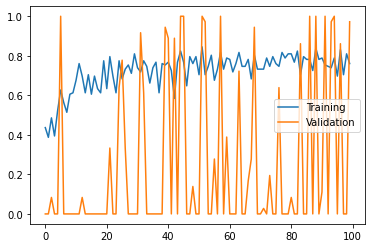

In [ ]:

accuracies = history.history['accuracy']
validation_accuracies = history.history['val_accuracy']


## Uncomment to visualize
plt.plot(accuracies, label = 'Training')
plt.plot(validation_accuracies, label = 'Validation')
plt.legend();

[Back to top](#-Index)

### Problem 6

#### A second model



To deal with the above results, one thing to note is the neural networks are sensitive to the scale of the data.  Build a second model named `model_2` below with identical settings to that model above.  Fit this to a scaled version of the `X` data named `X_scaled`, and uncomment the code to plot the results below.  

In [ ]:

tf.random.set_seed(42)
X_scaled = StandardScaler().fit_transform(X)
model = Sequential([Dense(100, activation = 'relu'),
                   Dense(3, activation = 'softmax')])
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_scaled, y_ohe, epochs = 100, verbose = 0, validation_split=0.2)


## Uncomment to visualize
#plt.plot(accuracies, label = 'Training')
#plt.plot(validation_accuracies, label = 'Validation')
#plt.legend();